## **About This Project**

**Background**

This project will focus on clinical variables that might be one of the factors to predict heart failure earlier. 

**Data Overview**

1. Age : Age of patient
2. Anemia : If patient has anemia (decrease of red blood cells or hemoglobin)
3. Creatinine_pospokinase : level of creatine in blood that can indicate there are injury from brain,heart,or muscle (mcg/L).
4. Diaetes : if patient has diabetes
5. Ejection_fraction : Percentage of blood leaving the hearth at each heart muscle constraction (percentage)
6. High_blood_pressure : if the patient has hypertension history
7. Platelets : level of platelets in blood (kiloplatelets/mL).
8. Serum_creatinine : level of serum creatinine in blood that can measure how good kidney function (mg/dL).
9. Serum_sodium : Level of serum sodium in the blood that can measure balance of electrolyte and water in blood vessels (mEq/L).
10. Sex : Women or Man (Non biner is not accepted)
11. Smoking : if the patient is smoker or not
12. Time : Follow-up perioed (days)
13. Death_event : if the patient deceased during the folloe-up period

## **Preparation**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Load Dataset

In [63]:
# Load data
sc= r'C:\Users\fahru\Documents\Python_Code\Prediction Model\heart_failure_clinical_records_dataset.csv'
data=pd.read_csv(sc)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**NOTE**

Drop time column because only focus on clinical variables.

In [65]:

datac= data.drop(columns='time')
datac.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Data Understanding

**NOTE**

Patient clasified on 'Death_Event':

- 0 : survived patient 
- 1 : deceased patient

Patient clasified by sex:

- 0 : Women 
- 1 : Male

Patient clasified on another bolean data type(aneamia,diabetes,high_blood_fraction,smoking)

- 0 : Absence
- 1 : Presence

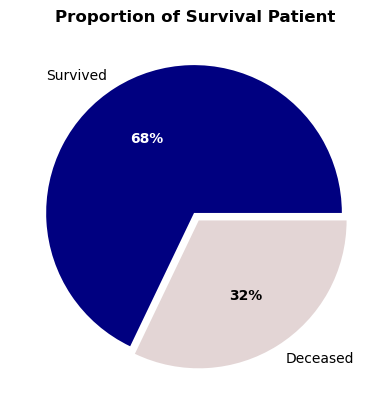

In [66]:
# Survival Rate Patient

surv= datac.groupby('DEATH_EVENT')['sex'].count().reset_index(name='Number of Patient')

_,labels,autopct= plt.pie(x=surv['Number of Patient'], autopct='%.0f%%', labels=['Survived','Deceased'],
            colors=['navy',"#E3D5D5"], explode=(0.01,0.05))
plt.setp(autopct[0], color='white', weight='bold')
plt.setp(autopct[1], weight='bold')

plt.title('Proportion of Survival Patient', fontdict={'weight':'bold'})
plt.show()

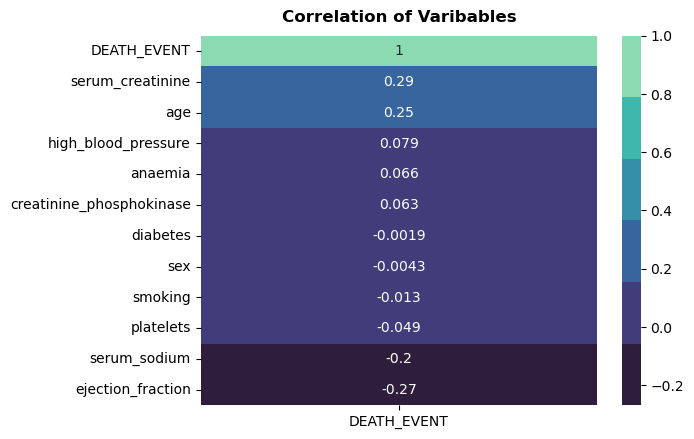

In [67]:
# Correlation Between Death Event Variable and Each Other
from sklearn.preprocessing import LabelEncoder

encod= LabelEncoder()
dd= datac.copy()
dd['DEATH_EVENT']= encod.fit_transform(dd['DEATH_EVENT'])

sns.heatmap(dd.corr().sort_values('DEATH_EVENT',ascending=False)[['DEATH_EVENT']], 
            annot=True, cmap=sns.color_palette('mako'))
plt.title('Correlation of Varibables', pad=10, weight='bold')
plt.show()

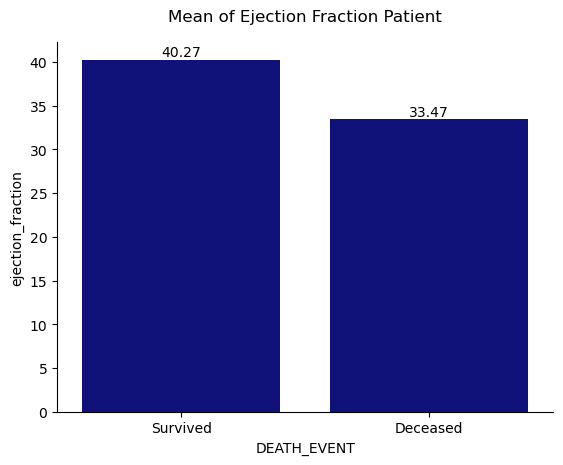

In [68]:
# Proportion of ejection_fractaion 
ejec= datac.groupby('DEATH_EVENT')['ejection_fraction'].mean().round(2).reset_index()
ax= sns.barplot(data=ejec, x='DEATH_EVENT', y='ejection_fraction', color='darkblue')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=ejec['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Ejection Fraction Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

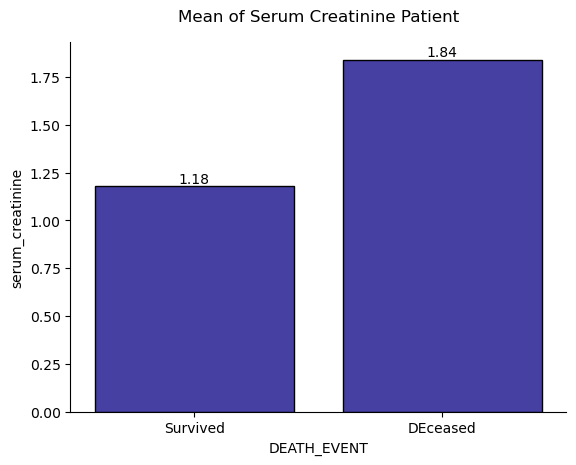

In [69]:
# Proportionn of Serum Creatine

serum= datac.groupby('DEATH_EVENT')['serum_creatinine'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_creatinine', color="#3930B3", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','DEceased'])

plt.title('Mean of Serum Creatinine Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

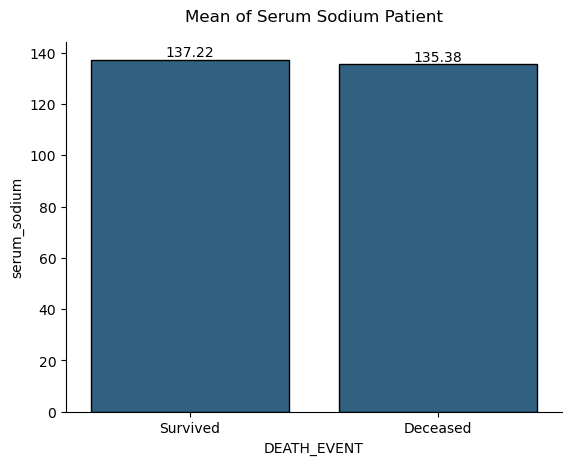

In [70]:
# Proportionn of Serum Sodium

serum= datac.groupby('DEATH_EVENT')['serum_sodium'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_sodium', color="#23648D", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Serum Sodium Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

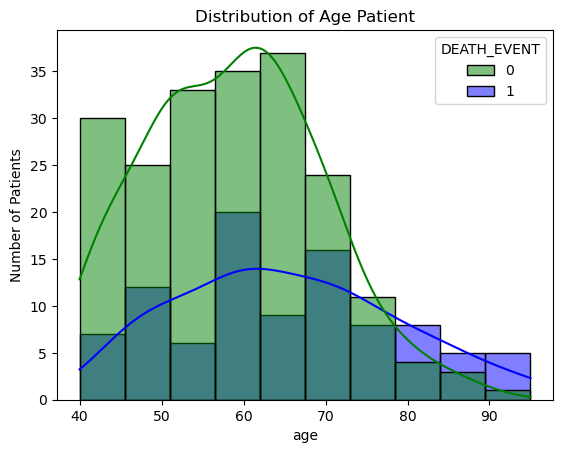

In [71]:
# Distribution of Age Patient
ax= sns.histplot(data=datac, x='age', hue='DEATH_EVENT',kde=True, palette=['green','blue'])
plt.ylabel('Number of Patients')

plt.title('Distribution of Age Patient')
plt.show()

## **Data Preparation**

In [72]:
# Data null check
datac.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [73]:
# Data duplicate check
datac.duplicated().sum()

np.int64(0)

In [74]:
# Data Outlier Check
from scipy import stats

score= stats.zscore(datac)
zz= score[(score>3) | (score<-3)]
print(np.sort(zz))

[-5.36320604 -4.68217606 -3.54712608  3.49157257  3.49166818  3.49363727
  3.5477164   3.66284274  4.08620602  4.26627752  4.55675602  4.776848
  4.902082    5.23453919  5.47161938  6.00817985  7.35049592  7.36471488
  7.51463953  7.75201955]


We try use Q1 and Q3 values frim each group of outlier to outlier handling at this time.

In [75]:
# Outlier Handling 

def HO(data,colum):
    col=colum
    for o, col in enumerate(col):
        for i in [col]:
            Q3, Q1, = np.quantile(data.loc[:,i], [0.75, 0.25])
            IQR= Q3-Q1
            data.loc[data[i]>Q3+1.5*IQR,col]= Q3.astype(int)
            data.loc[data[i]<Q1-1.5*IQR,col]= Q1.astype(int)

HO(datac,datac.columns)
datac.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,582,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,1.0,134,0,0,1


In [76]:
# Check Outlier again
score= stats.zscore(datac)
zz= score[(score>3) | (score<-3)]
print(np.sort(zz))

[-3.07424218  3.02029888  3.02029888  3.02029888  3.02029888  3.02029888
  3.02874645  3.07992571  3.0908927   3.12379365]


The result better than before and still around of zscore limit which is between -3 and 3. 

## **Data Transformation**

### Seperate Predictor variabel

Seperate independent and Dependent variables(DEATH_EVENT)

In [77]:
# Seperate Data
predic= datac[datac.columns.difference(['DEATH_EVENT'])]
predic.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,582,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,1.0,134,0,0


### Seperate Numerical and Categorical Data

Seperate Categorical and Numerical data from Predictor variables.

Categorical Data

In [78]:
# Change data type
predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= predic[['anaemia','diabetes','high_blood_pressure'
                                                                              ,'sex','smoking']].astype(str)
# Encoding Categorical data
predic= pd.get_dummies(predic, dtype=int)
predic.head()

C:\Users\fahru\AppData\Local\Temp\ipykernel_24108\1157093769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= predic[['anaemia','diabetes','high_blood_pressure'


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,1,0,1,0,0,1,0,1,1,0
1,55.0,582,38,263358.03,1.1,136,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,1.0,134,0,1,0,1,1,0,1,0,1,0


In [79]:
# Categorical Columns
cat_col= predic.columns[6:]
cat_col

Index(['anaemia_0', 'anaemia_1', 'diabetes_0', 'diabetes_1',
       'high_blood_pressure_0', 'high_blood_pressure_1', 'sex_0', 'sex_1',
       'smoking_0', 'smoking_1'],
      dtype='object')

In [80]:
# Define Categorycal Data
pred_cat= predic[cat_col]
pred_cat.head()

,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,1
3,0,1,1,0,1,0,0,1,1,0
4,0,1,0,1,1,0,1,0,1,0


 Numerical Data

In [81]:
# Numerical Columns
num_col= predic.columns[:6]
num_col

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')

In [82]:
# Define Numerical Data
pred_num= predic[num_col]
pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,582,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,1.0,134


In [83]:
# Standardization Numerical Data
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
pred_num= pd.DataFrame(std.fit_transform(pred_num))
pred_num.columns=num_col
pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976


### Merge Predictor Data

In [84]:
# Merge Data For Independent Variables
X=pd.concat([pred_num,pred_cat], axis=1)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205,1,0,1,0,0,1,0,1,1,0
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361,1,0,1,0,1,0,0,1,1,0
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013,1,0,1,0,1,0,0,1,0,1
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446,0,1,1,0,1,0,0,1,1,0
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976,0,1,0,1,1,0,1,0,1,0


In [85]:
# Define Dependent Variables
Y= datac['DEATH_EVENT']
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

### Correlation Chenck

Check correlation each independnt variables to avoid high relationship between them. Correlation values more than 0.7 will be drop.

<Axes: >

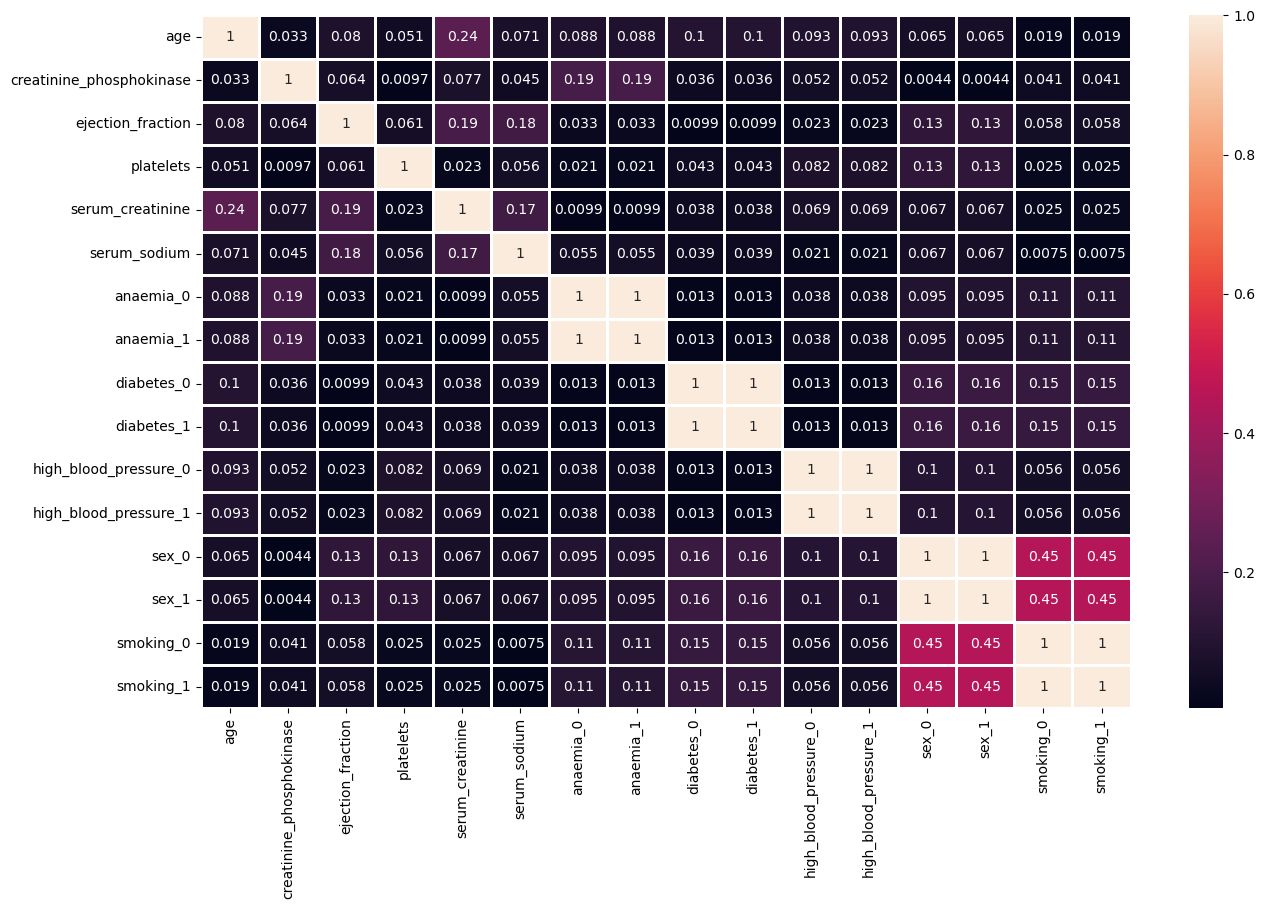

In [86]:
# Check correlation 
cor= X.corr().abs()     ## Abs because we don't need correlation direction

plt.figure(figsize=(15,9))
sns.heatmap(cor, annot=True, linewidths=2)

<Axes: >

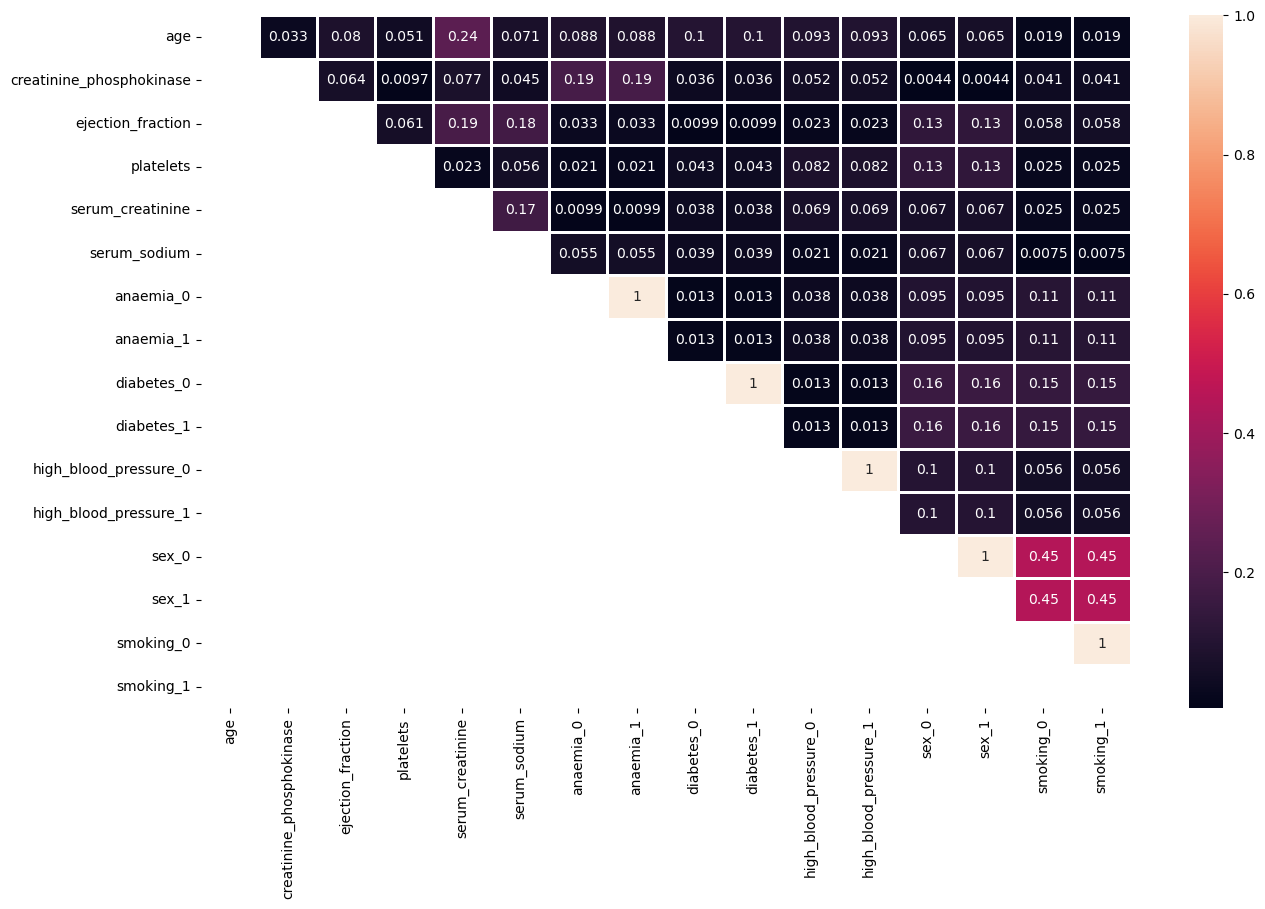

In [87]:
# Remove Redundant 
up= cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

plt.figure(figsize=(15,9))
sns.heatmap(up, annot=True, linewidths=2)

In [88]:
# Identify every corr value more than 0.7
drop_list= [i for i in up.columns if any(up[i]>0.7)]
drop_list

['anaemia_1', 'diabetes_1', 'high_blood_pressure_1', 'sex_1', 'smoking_1']

In [89]:
# Drop Every columns
X= X.drop(columns=drop_list)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,diabetes_0,high_blood_pressure_0,sex_0,smoking_0
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205,1,1,0,0,1
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361,1,1,1,0,1
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013,1,1,1,0,0
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446,0,1,1,0,1
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976,0,0,1,1,1


## **Splitting Dataset**

Splitting Dataset to data train and test. Proportion of these data set is 70% of data train and 30% of data test.

In [90]:
# Split Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=30)
print(len(x_train))
print(len(x_test))

209
90


## **Modelling**

Use Logistic regression and gradient boosting algorithm for build a model. Also use GridsearchCV to find the best hyper-parameters. 

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score,f1_score

### Logistic Regression

In [92]:
# Define Hyperparamter

penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling,
                           class_weight=class_weight, solver=solver, max_iter=max_iter)

In [93]:
# Create Model
from sklearn.linear_model import LogisticRegression

metode= LogisticRegression()
log_grid= GridSearchCV(estimator=metode, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

start= time.time()
log_result= log_grid.fit(x_train,y_train)

print(f'Best Score: {log_result.best_score_} using hyperparameter: {log_result.best_params_}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.7461538461538462 using hyperparameter: {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Running time: 12.31 second


### Gradient Boosting

In [94]:
# Define Hyperparamerter

gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],
               'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score=['recall','accuracy', 'precision']

In [95]:
# Create Model
from xgboost import XGBClassifier

metode= XGBClassifier()
gb_grid= GridSearchCV(estimator=metode, param_grid=gbparameter, scoring=score, refit='recall', verbose=0, cv=5, n_jobs=-1)

start= time.time()
gb_result= gb_grid.fit(x_train,y_train)

print(f'Best Score: {gb_result.best_score_} using hyperparameter: {gb_result.best_params_}')
print(f'Accuracy of best recall: {gb_result.cv_results_['mean_test_accuracy'][gb_result.best_index_]}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.6307692307692309 using hyperparameter: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 25, 'scale_pos_weight': 3}
Accuracy of best recall: 0.683855981416957
Running time: 12.07 second


## **Evaluation**

### Linear Regression

In [96]:
# Evaluation Linear regression
from sklearn import metrics

y_pred= log_grid.predict(x_test)

print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')
print(f'Recall: {metrics.recall_score(y_test,y_pred)}')

Accuracy: 0.6777777777777778
Recall: 0.6896551724137931


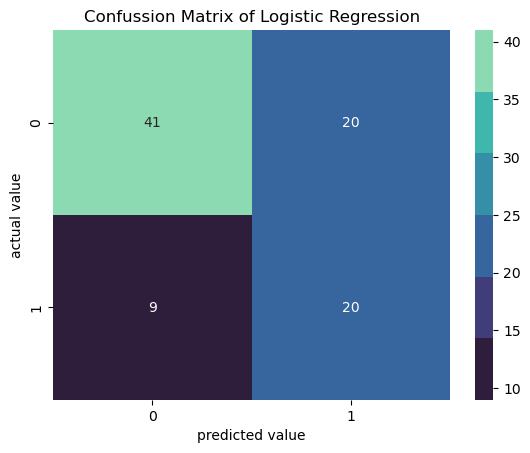

In [111]:
# Confussion Matrix

confus= confusion_matrix(y_test,y_pred)
sns.heatmap(confus, annot=True, cmap=sns.color_palette('mako'))
plt.title('Confussion Matrix of Logistic Regression')
plt.xlabel('predicted value')
plt.ylabel('actual value')

plt.show()

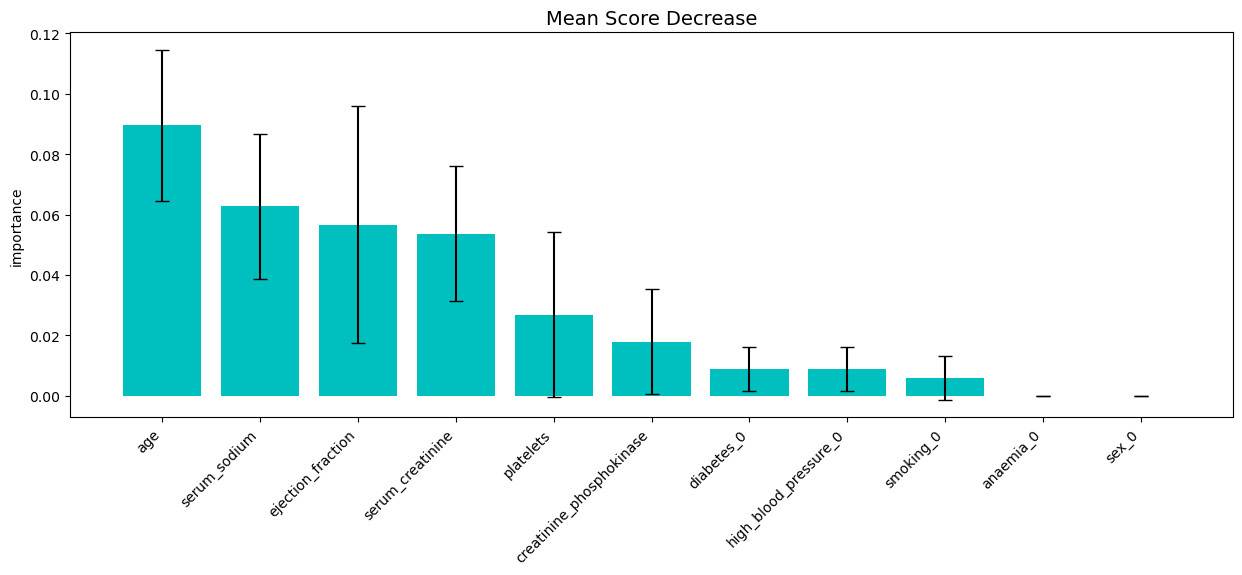

In [116]:
# Most importance variable by model to predict best recall
from jcopml.feature_importance import mean_score_decrease

cek_log= mean_score_decrease(x_train,y_train, log_grid, plot=True, topk=20)

### Gradient Boosting

In [117]:
# Evaluation of Model
from sklearn import metrics

y_pred_gb= gb_grid.predict(x_test)

print(f'Accuarcy: {metrics.accuracy_score(y_test,y_pred_gb)}')
print(f'Recall: {metrics.recall_score(y_test,y_pred_gb)}')

Accuarcy: 0.6444444444444445
Recall: 0.6896551724137931


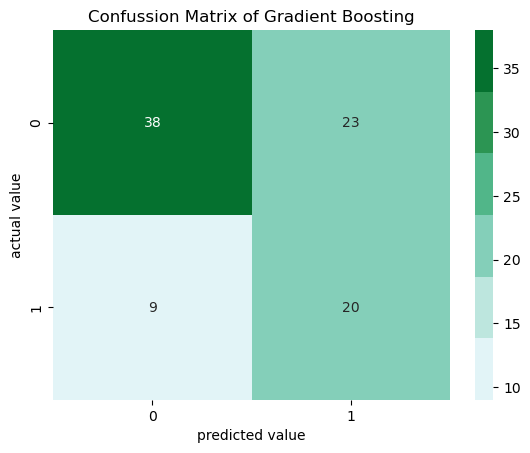

In [120]:
# Confussion Matrix

cunfus= confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cunfus, annot=True, cmap=sns.color_palette('BuGn'))
plt.title('Confussion Matrix of Gradient Boosting')
plt.xlabel('predicted value')
plt.ylabel('actual value')

plt.show()

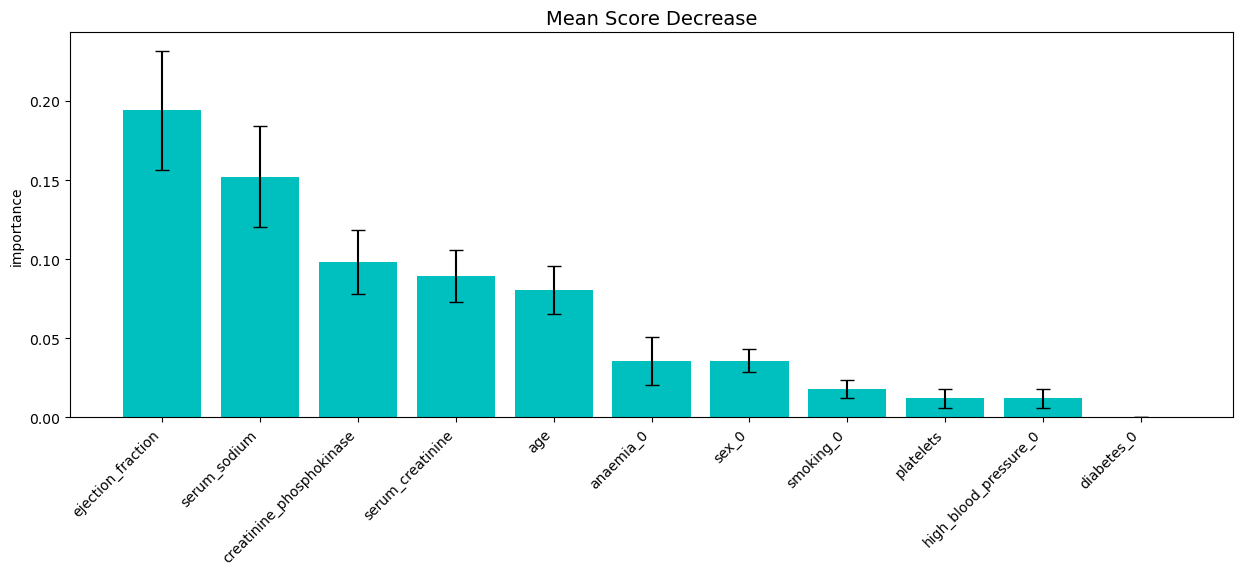

In [121]:
# Most Important variable by model to predict best recall
from jcopml.feature_importance import mean_score_decrease

cek_gb= mean_score_decrease(x_train, y_train, gb_grid, plot=True, topk=20)

## Coret

In [122]:
log_best= log_result.best_params_
modelog= LogisticRegression(C=log_best['C'], class_weight=log_best['class_weight'], fit_intercept=log_best['fit_intercept'],
                          intercept_scaling=log_best['intercept_scaling'], max_iter=log_best['max_iter'],
                          penalty=log_best['penalty'], solver=log_best['solver'], tol=log_best['tol'])
model=modelog.fit(x_train,y_train)
p_redic= model.predict(x_test)
print(recall_score(y_test,p_redic))
print(accuracy_score(y_test,p_redic))

0.6896551724137931
0.6777777777777778


<Axes: >

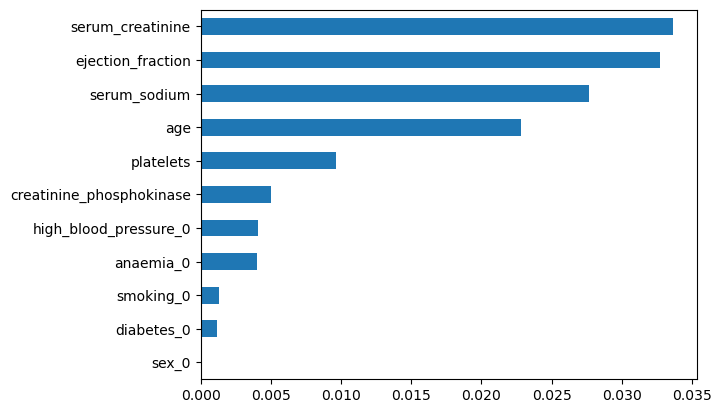

In [ ]:
# How each predictor variabels affects dependent variabels

variable= X.columns
coef= model.coef_[0]
coef_data= pd.Series(abs(coef), index=variable)

coef_data.sort_values(ascending=True).plot(kind='barh')